# Load Dataset

In [5]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [29]:
train = pd.read_csv("../data/train.csv", parse_dates=["datetime"])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
test = pd.read_csv("../data/test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

# Feature Engineering

- 머신러닝 알고리즘을 작동하기 위해 데이터에 대한 도메인 지식을 활용하여 Feature를 만들어 내는 과정
- 모델의 성능에 미치는 영향이 크기 때문에 머신러닝 응용에 있어 가장 중요한 단계이며, 전문성과 시간, 비용이 많이 든다.

## 방법적 측면

### 1. Feature Selection(특징 선택)
- Feature Ranking 또는 Feature Importance 라고도 불림
- 분류 모델 중 Decision Tree의 경우 트리의 상단에 있을수록 중요도가 높으므로, 이를 반영하여 특징 별 중요도를 매길 수 있다.
- 회귀 모델의 경우 forward selection과 backward elimination같은 알고리즘을 통해 특징을 선택

### 2. Dimension Reduction(차원 감소)
- 차원 감소는 feature extraction 다시 말해 특징 추출이라는 말로도 불립니다.
- 차원축소는 단순히 데이터의 압축이나 잡음(noise)을 제거하는 것이 아니라는 것을 말씀드리고 싶습니다. 물론 차원축소로 데이터의 압축이나 잡음을 제거하는 효과도 있겠지만, **이것의 가장 중요한 의의는 관측 데이터를 잘 설명할 수 있는 잠재 공간(latent space)을 찾는 것입니다.**
- 가장 대표적인 알고리즘에 PCA(Principle Component Analysis)가 있습니다.
- PCA를 간단히 설명하면 각 변수(Feature)를 하나의 축으로 투영시켰을 때 분산이 가장 큰 축을 첫번째 주성분으로 선택하고 그 다음 큰 축을 두번째 주성분으로 선택하고 데이터를 선형 변환하여 다차원을 축소하는 방법입니다.(여기서는 2개의 차원으로 축소, PCA에 대한 내용은 다음에 보다 자세히 공부하고 정리하겠습니다.)

## 도메인(분야) 전문성 측면

### 3. 특징 생성(Feature Generation) or 특징 구축(Feature Construction)

- 이 방법을 흔히 많은 사람들이 Feature Engineering이라고 말합니다. 간단히 설명하면 초기에 주어진 데이터로부터 모델링 성능을 높이는 새로운 특성을 만드는 과정이라고 설명할 수 있습니다. 이때 데이터에 대한 도메인(분야) 전문성을 바탕으로 데이터를 합치거나 쪼개는 등의 작업을 거쳐 새로운 Feature를 만들게 됩니다.
- 간단한 예로 시간 데이터를 AM / PM 으로 나누는 것이 있습니다.
- 이 작업은 한번 해서 끝나는 것이 아니라 끊임없이 모델링 성능을 높이는 목적으로 반복해서 작업할 수 있는 부분이기 때문에 전문성과 경험에 따라 비용과 시간을 줄일 수 있는 부분입니다.

## Feature Engineering 방법

### 1. 관점에 따른 분류
- **Business driven features** : 해결하려는 문제가 있는 현장인 비즈니스 관점에서 데이터를 분석하여 특징을 만들어내는 관점입니다.
- **Data driven features** : 비즈니스 관점이 없어도 주어진 데이터를 다루는 과정에서 특징을 만들어내는 관점입니다.

    위의 두 가지를 설명을 위해 구분하였지만 실제로는 분리되어 있지 않고 서로 조합되어 좋은 Feature를 만들게 됩니다.
    
### 2. 방법에 따른 분류
- 지표 변수(Indicator Variables) : 지표 변수를 만드는 것으로 예를 들어 나이 feature로 부터 21세 이상일 경우 성인으로 구분하는 feature를 만들 수 있습니다. 그리고, 부동산 정보의 경우 침실과 화장실의 갯수를 통해 부동산 가치를 판단하는 지표 변수를 만들 수 있습니다.

- 중복 특징(Interaction Features) : 두 개의 특징을 결합하여 새로운 특징을 만드는 방법입니다. 예를 들어 클릭 수와 접속 수를 결합하여 클릭 당 방문자수와 같은 특징을 만들 수 있습니다. 주의해야할 점은 특징이 늘어나기 때문에 자동으로 이러한 작업을 할 경우 특징이 너무 많아질 수가 있습니다.(feature explosion이라고 합니다.)

- 대표 특징(Feature Representation) : 특징들로부터 대표성을 갖는 새로운 특징을 만드는 작업입니다. 예를 들어, 미국의 12학년 제도로 표시되는 데이터가 있을 때 이를 기반으로 초등학교, 중학교, 고등학교와 같이 대표성을 가는 특징을 만들 수 있습니다.

- 외부 데이터(External Data) : 모델 성능을 높이기 위해 기존의 주어진 데이터 외의 다른 데이터를 활용하는 방법입니다.

- 에러 분석(Error Analysis - Post-Modeling) : 모델을 통해 나온 결과를 바탕으로 특징을 만드는 방법입니다. 일반적으로 데이터 사이언스의 프로세스가 반복을 기반으로 모델의 성능을 높이기 때문에 당연하다고 생각하실 수도 있을 것 같습니다. 그래서 아래에 보다 구체적으로 구분한 에러 분석을 통해 특징을 만드는 방법을 소개해드리겠습니다.

    - Start with larger errors : 모델을 통해 나온 모든 값을 확인하기 보다 ‘에러(Error)’값이 큰 feature부터 확인하는 방법입니다.

    - Segment By classes : 평균 에러(Error)값을 기준으로 Segment를 나누어 비교하면서 분석하는 방법입니다.

    - Unsupervised clustering : 패턴을 발견하는데 어려움이 있을 경우 Unsupervised(비지도) 학습인 clustering 알고리즘을 사용하여 분류되지 않은 값들을 확인하는 방법입니다. 여기서 clustering을 클래스로 분류하는 것이 아니라 에러(Error)의 원인을 찾는 방법으로 사용해야 한다는 점을 주의해야 합니다.

    - Ask colleagues or domain experts : 데이터를 통해서 발견할 수 없다면 도메인(분야) 전문가의 도움을 통해 에러(Error)의 원인을 찾아낼 수도 있습니다.

In [15]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [16]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

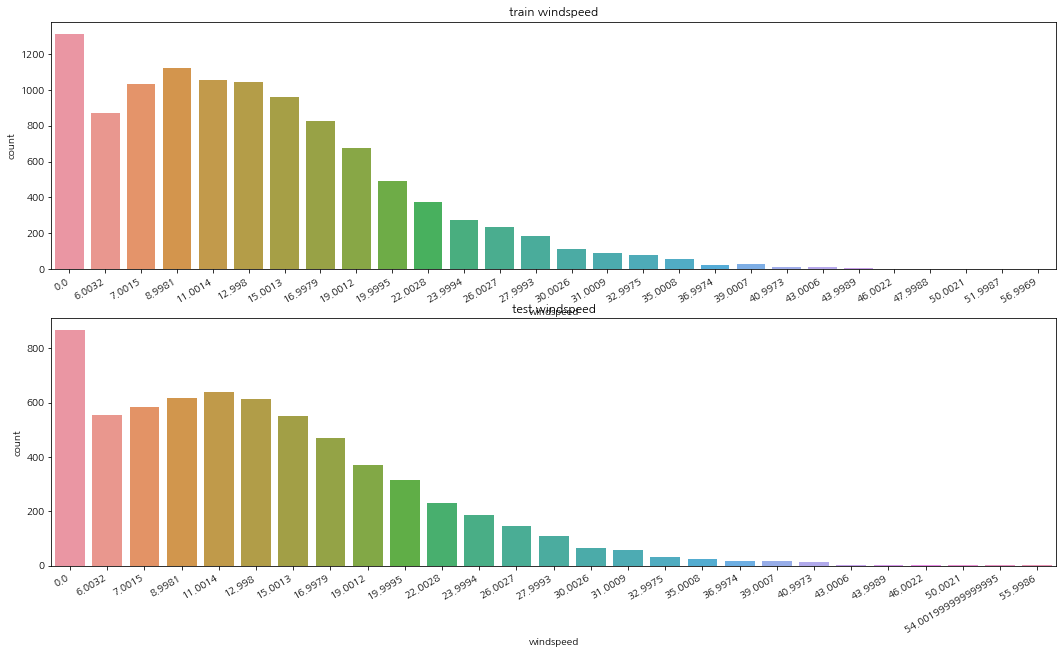

In [17]:
# widspeed 풍속에 0 값이 가장 많다. => 잘못 기록된 데이터를 고쳐 줄 필요가 있음
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])

In [18]:
# 풍속의 0값에 특정 값을 넣어준다.
# 평균을 구해 일괄적으로 넣어줄 수도 있지만, 예측의 정확도를 높이는 데 도움이 될것 같진 않다.
# train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()
# test.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()

In [19]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [20]:
# 그래서 머신러닝으로 예측을 해서 풍속을 넣어주도록 한다.
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택한다.
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

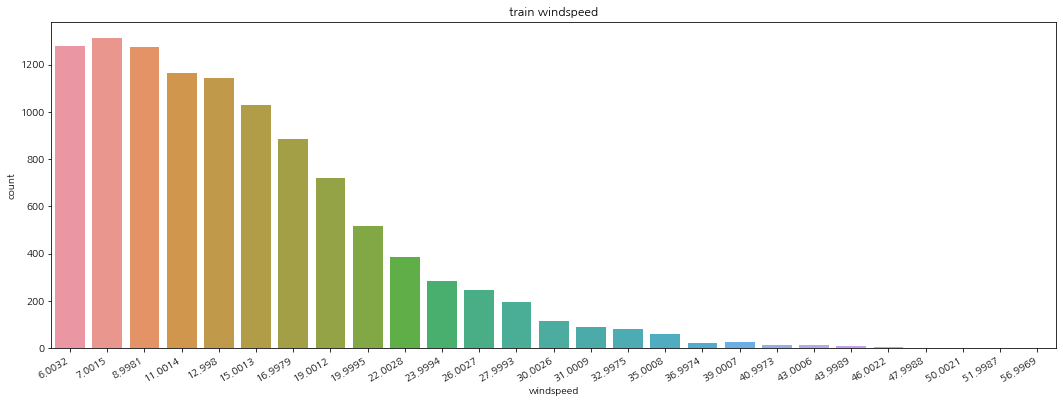

In [21]:
# 0값을 조정한다.
train = predict_windspeed(train)
# test = predict_windspeed(test)

# widspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

# Feature Selection
- 신호와 잡음을 구분해야 한다.
- 피처가 많다고 해서 무조건 좋은 성능을 내지 않는다.
- 피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.

In [27]:
# 연속형 feature와 범주형 feature 
# 연속형 feature = ["temp","humidity","windspeed","atemp"]
# 범주형 feature의 type을 category로 변경 해 준다.
# 범주형은 숫자의 의미가 수치를 나타내는 것이 아니기 때문에 그대로 학습할 경우 문제가 발생한다.
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [28]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [24]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [26]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [25]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


# RMSLE

캐글에서 사용된 해당 문제의 점수 판단 방법

- 과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다.

- 오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root) 으로 값이 작을 수록 정밀도가 높다.

- 0에 가까운 값이 나올 수록 정밀도가 높은 값이다.

- Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE)

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

- ${n}$ is the number of hours in the test set
- $p_i$ is your predicted count
- $a_i$ is the actual count
- $\log(x)$ is the natural logarithm
- 잔차(residual)에 대한 평균에 로그를 씌운 값이다. => 과대평가 된 항목보다 과소 평가 된 항목에 패널티를 주기위해
- 정답에 대한 오류를 숫자로 나타낸 값으로 값이 클 수록 오차가 크다는 의미다.
- **값이 작을 수록 오류가 적다는 의미를 나타낸다.**

In [30]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

# Cross Validation 교차 검증

일반화 성능을 측정하기 위해 데이터를 여러 번 반복해서 나누고 여러 모델을 학습한다.

 ![k_fold](\img\k-fold.png)
 
## KFold 교차검증
- 데이터를 폴드라 부르는 비슷한 크기의 부분집합(n_splits)으로 나누고 각각의 폴드 정확도를 측정한다.
- 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련세트로 사용하여 학습한다.
- 나머지 훈련세트로 만들어진 세트의 정확도를 첫 번째 폴드로 평가한다.
- 다음은 두 번째 폴드가 테스트 세트가 되고 나머지 폴드의 훈련세트를 두 번째 폴드로 정확도를 측정한다.
- 이 과정을 마지막 폴드까지 반복한다.
- 이렇게 훈련세트와 테스트세트로 나누는 N개의 분할마다 정확도를 측정하여 평균 값을 낸게 정확도가 된다.

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# RandomForest

In [36]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [39]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 8.71 s
Score= 0.33111


***
### cross_val_score(model, X, y, scoring=None, cv=None) 함수 설명
***
- model : 회귀 분석 모형
- X : 독립 변수 데이터
- y : 종속 변수 데이터
- scoring : 성능 검증에 사용할 함수 이름
- cv : 교차검증 생성기 객체 또는 숫자.
- None이면 KFold(3)
- 숫자 k이면 KFold(k)

**단 cross_val_score 명령은 scikit-learn에서 제공하는 모형만 사용할 수 있다. statsmodels의 모형 객체를 사용하려면 다음과 같이 scikit-learn의 RegressorMixin으로 래퍼 클래스(wrapper class)를 만들어주어야 한다.**

> https://datascienceschool.net/view-notebook/266d699d748847b3a3aa7b9805b846ae/

# Train

In [40]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [41]:
# 예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.41,   5.16,   4.36,   3.59,   3.19,   6.34,  38.17, 105.65,
       235.58, 137.3 ])

[Text(0.5, 1.0, 'test')]

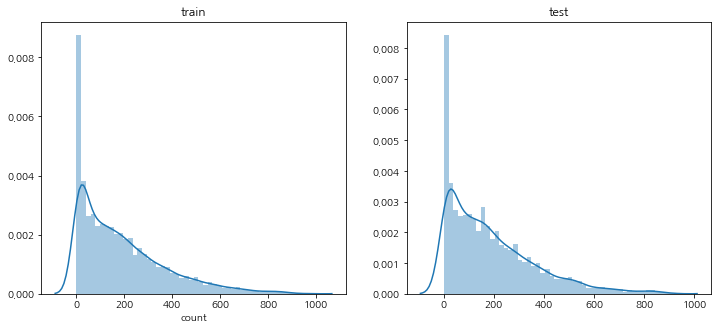

In [42]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

예측 결과(test)가 학습결과와 차이를 보여준다. 특히 200 ~ 400 사이에 차이가 나타나고 있다.

하지만 경향성은 비슷해 보인다.

# Sumbit

In [44]:
submission = pd.read_csv("../data/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.41
1,2011-01-20 01:00:00,5.16
2,2011-01-20 02:00:00,4.36
3,2011-01-20 03:00:00,3.59
4,2011-01-20 04:00:00,3.19


In [46]:
submission.to_csv("../data/Score_{0:.5f}_submission.csv".format(score), index=False)